Topic Modeling using LSA:
Talking about NLP, Topic Modeling is one of its most important topics. In this article, let’s try to understand what topic modeling is and how to implement it in python language.

What is Topic Modeling?
NLP’s topic modeling technique is used to infer from the text of a set of documents what they are about. It works by scanning a collection of documents, identifying word and phrase patterns within them, and then automatically clustering word groups and related phrases that best describe a collection of documents. It discovers hidden patterns or data groupings.

 let’s try to implement topic modeling using the Latent Semantic Analysis (LSA) algorithm. But before we start the implementation, let’s understand the concept of LSA.

One can also implement topic modeling using Latent Dirichlet Allocation (LDA). To learn more about it, read Latent Dirichlet Allocation (LDA) Algorithm in Python

What is LSA?
A technique used in natural language processing called latent semantic analysis (LSA), particularly distributional semantics, evaluates connections between a collection of documents and the terms they include by creating a collection of concepts connected to the documents and terms using statistics. It is commonly used for data clustering and data collection under the domain of text analysis.

Concept searching and automatic document classification are also the two main uses of LSA. It is an unsupervised learning approach which means there is a particular target to achieve or no labels or tags are assigned. The goal of latent semantic analysis is to produce representations of the text data in terms of these topics or latent characteristics.

The word latent itself means hidden. We are looking at anything that is latent (hidden) or inherent to the data itself. We will be able to decrease the dimensionality of the original text-based data collection as a byproduct of this.

How does LSA works?
The working of Latent Semantic Analysis primarily involves four steps. the second and third are more crucial and complex to understand. The steps are as given below
Collect raw Text Data
Generate a document term matrix
Perform Singular Value Decomposition (SVD)
Examine Topic encoded data
Collecting Raw Text Data
The data caused for topic modeling is always in the text format. The input provided is generally a collection of documents. To understand the concept, given below is the example. But when working on actual projects, data is usually scraped from various open sources like social media, reports, etc.
Document 1: The smallest country in the world
Document 2: The largest country in the world.
Document 3: The largest city in my country.
Document 4: The smallest city in the world.


In [7]:
text=[ "The smallest country in the world.",
 "The largest country in the world."
 "The largest city in my country."
"The smallest city in the world."]


Document Term Matrix
A document-term matrix is a mathematical matrix that indicates the frequency of terms that appear in a set of documents. In a document-term matrix, columns represent terms in the collection and rows represent documents in the collection. This matrix is an example of a document-feature matrix, where “features” can relate to more than just terms in a document. 

Another frequent format is the transposition, or term-document matrix, where terms are the rows and documents are the columns. The fundamental concept behind a document term matrix is that text documents can be represented as points in Euclidean space, also known as vectors.


Document Term Matrix

In [8]:
!pip install scikit-learn

In [9]:
import sklearn

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(text)


In [11]:
bag_of_words.todense()


matrix([[0, 1, 1, 0, 0, 1, 2, 1],
        [2, 2, 3, 2, 1, 1, 5, 2]], dtype=int64)

Here, using Scikit-Learn, we’ve defined the four documents we’ve been analyzing as four strings in a list. The count vectorizer model may be used to generate the document term matrix. As you can see, we imported the count vectorizer from the Scikit-Learn feature extraction dot text module.

After creating the count vectorizer, we fit and then convert our body into a collection of words. When we use the phrase “bag of words” in natural language processing, we’re referring to the most basic application of a document term matrix.

Singular value decomposition (SVD)
Singular value decomposition (SVD), a mathematical method, is used to condense a large piece of text into a matrix with word counts per document (rows represent unique words and columns represent each document). This technique reduces the number of rows while maintaining a similar structure among columns.

The cosine of the angle produced by any two vectors formed by columns is then used to compare documents, as is the dot product formed by the normalization of the two vectors. Values near 1 reflect documents that are extremely similar, while values near 0 describe documents that are quite different.

Similar to a principal component analysis, the singular value decomposition If you’re familiar with this statistical method, encoding the original data set with these latent features using latent semantic analysis will minimize its dimensionality. These latent features correspond to the original text data’s subjects.

The next stage is to perform our singular value decomposition; this may be done using the model’s truncated SVD of Scikit-Learn. We import truncated SVD from SK learn decomposition and use it to fit and then transform the bag of words into our LSA. The word “truncated” refers to the fact that we won’t get back as many vectors as we started with.



In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)


In [14]:
lsa


array([[ 2.56969082, -1.18181601],
       [ 7.19875197,  0.42186504]])

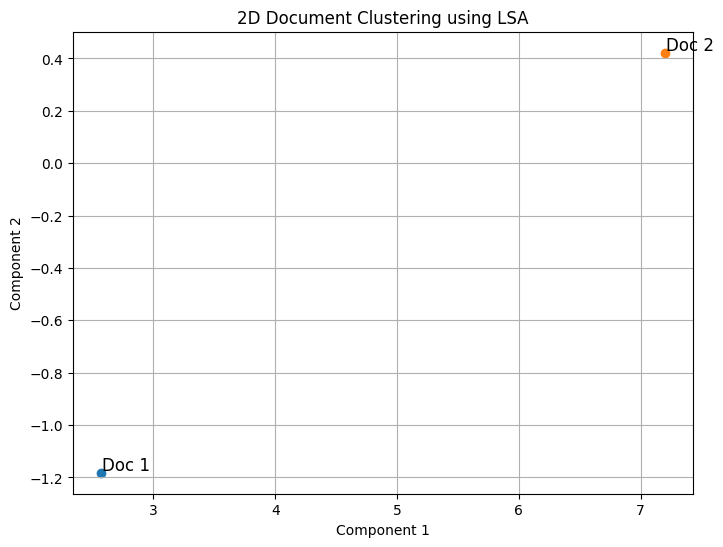

In [15]:
# Step 3: Plot results
plt.figure(figsize=(8, 6))
for i, doc in enumerate(text):
    x, y = lsa[i, 0], lsa[i, 1]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, f'Doc {i+1}', fontsize=12)

plt.title("2D Document Clustering using LSA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


A scatter plot of the documents in 2D LSA space.

Each point represents a document, clustered based on semantic similarity.

A scatter plot of the documents in 2D LSA space.

Each point represents a document, clustered based on semantic similarity.

Topic Encoded Data
This aims to transform our original data into topic-encoded data. The data now should consist of two columns one representing each of the two topics that we requested from the truncated SVD recalling that this value of two was passed as an argument to the truncated SVD.

To view the results of our LSA, we’ll use the pandas library. Here, we can see the four original documents that we started with as well as a numerical value for each of the two subjects. The first and fourth documents are about the largest places, whereas the second and third documents are about the smallest places.

Take note that all four documents are strong in topic one, but there is a clear distinction for topic two between the second and third documents and the first and fourth.

In [16]:
import pandas as pd

topic_encoded_df = pd.DataFrame(lsa, columns=["topic_1", "topic_2"])
topic_encoded_df["text"] = text
display(topic_encoded_df[["text", "topic_1", "topic_2"]])


,text,topic_1,topic_2
0,The smallest country in the world.,2.569691,-1.181816
1,The largest country in the world.The largest c...,7.198752,0.421865


Let me know if you'd like this saved to CSV, visualized, or used for clustering or classification.

ByProducts of LSA
One great thing about a latent semantic analysis is that it generates a few byproducts that can help us to understand what each topic is encoding two byproducts that we’re going to look at are:

The dictionary – that the dictionary is the set of all words that show up in at least one document in the body.

Encoding matrix – the encoding matrix was used to encode the documents into this topic-encoded representation it can be examined to get a greater understanding of what each topic represents.


In [17]:
dictionary = vectorizer.get_feature_names_out()
dictionary
# ['city', 'country', 'in', 'largest', 'my', 'smallest', 'the', 'world']

encoding_matrix = pd.DataFrame(svd.components_, 
                               index=['topic_1', 'topic_2'], 
                               columns=dictionary).T
encoding_matrix


,topic_1,topic_2
city,0.246426,0.535818
country,0.290408,-0.214704
in,0.413621,0.053205
largest,0.246426,0.535818
my,0.123213,0.267909
smallest,0.167195,-0.482613
the,0.704029,-0.161500
world,0.290408,-0.214704


Let’s take a look at the dictionary as an attribute of a fit count vectorizer model it can be accessed using the get feature names method. We can examine this matrix to gain an understanding of the topics latent to the body. Let’s look at this encoding matrix where each row represents a word in our dictionary and in each column one of our two topics the numerical values can be thought of as an expression of that word in a given topic.

Next, we’ll interpret the encoding matrix we might be interested in what are the top words for each topic or what dimensions in word space explain most of the variance. In the data note that we’re going to need to look at the absolute value of the expression of each word in the topic a word that has a strong negative representation is just as important as a word that has a strong positive picture when we go to interpret the topics.

In [19]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


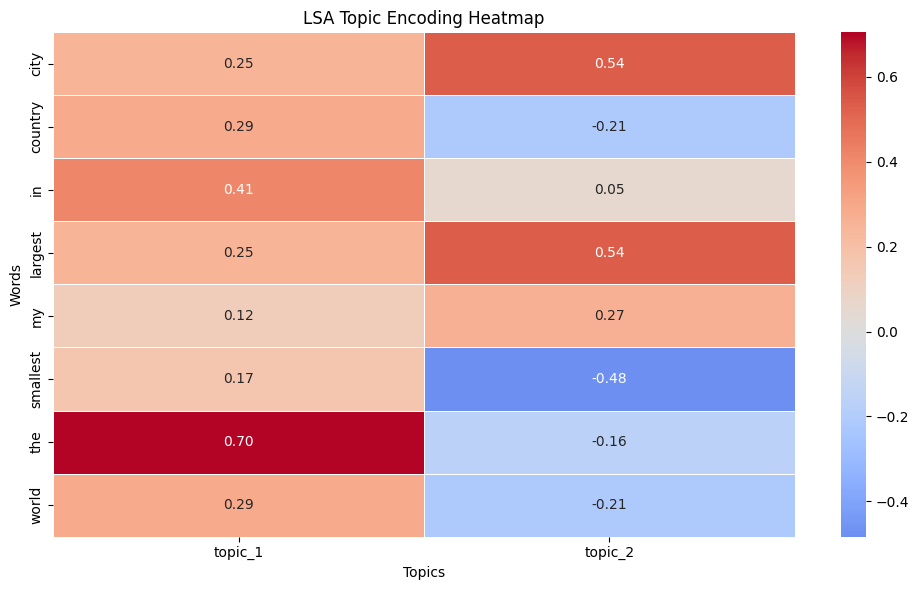

In [21]:
import seaborn as sns
# Create encoding matrix DataFrame
encoding_matrix = pd.DataFrame(svd.components_, index=["topic_1", "topic_2"], columns=dictionary).T

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(encoding_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("LSA Topic Encoding Heatmap")
plt.xlabel("Topics")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

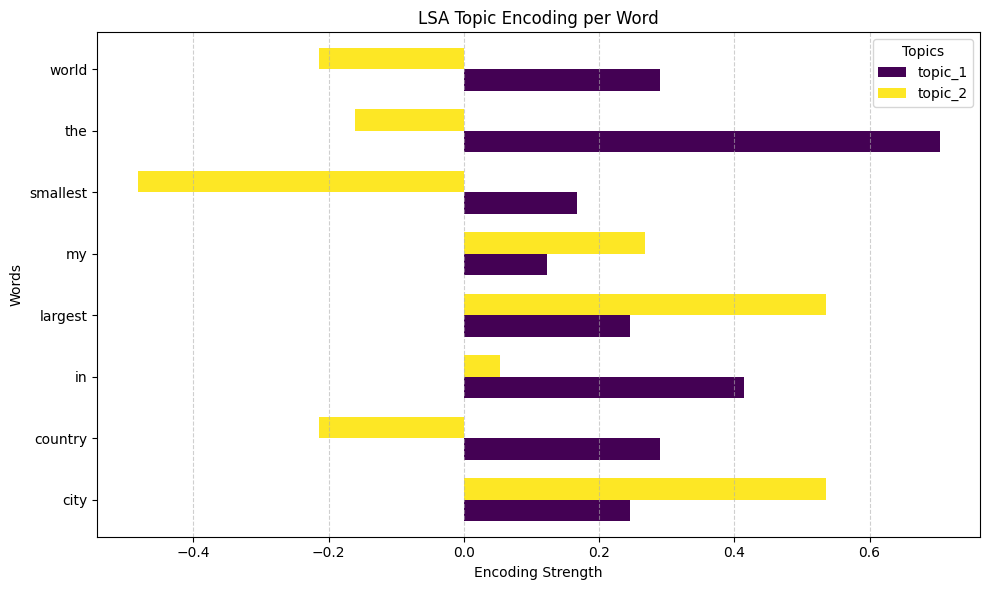

In [22]:
# Create the encoding matrix DataFrame
encoding_matrix = pd.DataFrame(svd.components_, index=["topic_1", "topic_2"], columns=dictionary).T

# Plotting
ax = encoding_matrix.plot(kind='barh', figsize=(10, 6), colormap='viridis', width=0.7)
plt.title('LSA Topic Encoding per Word')
plt.xlabel('Encoding Strength')
plt.ylabel('Words')
plt.legend(title='Topics')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

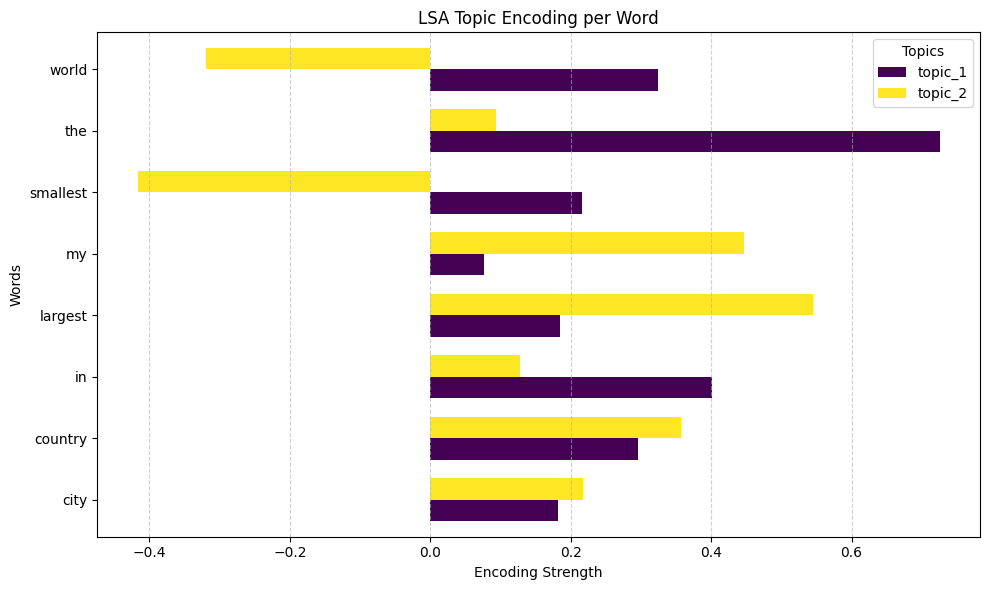

In [23]:
#sample
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have this from your previous code
dictionary = ['city', 'country', 'in', 'largest', 'my', 'smallest', 'the', 'world']
lsa_components = [
    [0.181982, 0.295558, 0.401066, 0.185396, 0.076474, 0.215670, 0.725688, 0.324592],
    [0.217759, 0.357253, 0.128093, 0.544969, 0.446919, -0.416877, 0.093326, -0.318826]
]

# Create the encoding matrix DataFrame
encoding_matrix = pd.DataFrame(lsa_components, index=["topic_1", "topic_2"], columns=dictionary).T

# Plotting
ax = encoding_matrix.plot(kind='barh', figsize=(10, 6), colormap='viridis', width=0.7)
plt.title('LSA Topic Encoding per Word')
plt.xlabel('Encoding Strength')
plt.ylabel('Words')
plt.legend(title='Topics')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


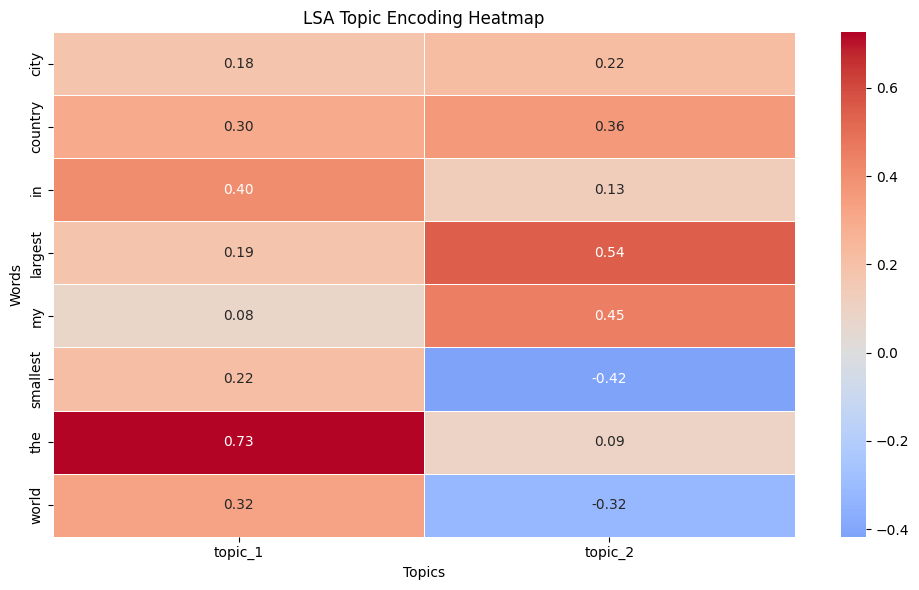

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data from your image
dictionary = ['city', 'country', 'in', 'largest', 'my', 'smallest', 'the', 'world']
lsa_components = [
    [0.181982, 0.295558, 0.401066, 0.185396, 0.076474, 0.215670, 0.725688, 0.324592],
    [0.217759, 0.357253, 0.128093, 0.544969, 0.446919, -0.416877, 0.093326, -0.318826]
]

# Create encoding matrix DataFrame
encoding_matrix = pd.DataFrame(lsa_components, index=["topic_1", "topic_2"], columns=dictionary).T

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(encoding_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("LSA Topic Encoding Heatmap")
plt.xlabel("Topics")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


Here's an alternate visualization of your LSA (Latent Semantic Analysis) encoding matrix using a horizontal bar chart. Each word's association strength with topic_1 and topic_2 is shown side-by-side to clearly illustrate how strongly each word contributes to each topic.
Here is the heatmap representing the Topic-Word Matrix, where:

Each row is a word (city, country, etc.)

Each column is a topic (topic_1, topic_2)

The cell values show the strength of association between the word and topic (as derived from LSA/SVD).

Key Observations:
"the" has the strongest positive association with topic_1.

"largest", "my" are strongly associated with topic_2.

"smallest" and "world" are negatively associated with topic_2, indicating opposing direction in the semantic space.

Let’s take a look at topic one as you can see the most important word is the word though in later videos we will look at removing words like them that don’t have a lot of meaning. Let’s take a look at topic two as you can see the two most important words are largest and smallest but let’s take a look at the original calculation.

We can see that largest is very strongly positive while the smallest is very strongly negative what this is telling us is that topic two is going to be a great topic for helping us to represent whether that document is about the largest or about the smallest.


In [25]:
import numpy as np

encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])

encoding_matrix.sort_values('abs_topic_1', ascending=False)


,topic_1,topic_2,abs_topic_1,abs_topic_2
the,0.725688,0.093326,0.725688,0.093326
in,0.401066,0.128093,0.401066,0.128093
world,0.324592,-0.318826,0.324592,0.318826
country,0.295558,0.357253,0.295558,0.357253
smallest,0.215670,-0.416877,0.215670,0.416877
largest,0.185396,0.544969,0.185396,0.544969
city,0.181982,0.217759,0.181982,0.217759
my,0.076474,0.446919,0.076474,0.446919


In [26]:
encoding_matrix.sort_values('abs_topic_2', ascending=False)


,topic_1,topic_2,abs_topic_1,abs_topic_2
largest,0.185396,0.544969,0.185396,0.544969
my,0.076474,0.446919,0.076474,0.446919
smallest,0.215670,-0.416877,0.215670,0.416877
country,0.295558,0.357253,0.295558,0.357253
world,0.324592,-0.318826,0.324592,0.318826
city,0.181982,0.217759,0.181982,0.217759
in,0.401066,0.128093,0.401066,0.128093
the,0.725688,0.093326,0.725688,0.093326


Here's the Python code to plot a horizontal bar chart of the top words by absolute contribution to topic_2, as seen in your sorted DataFrame:

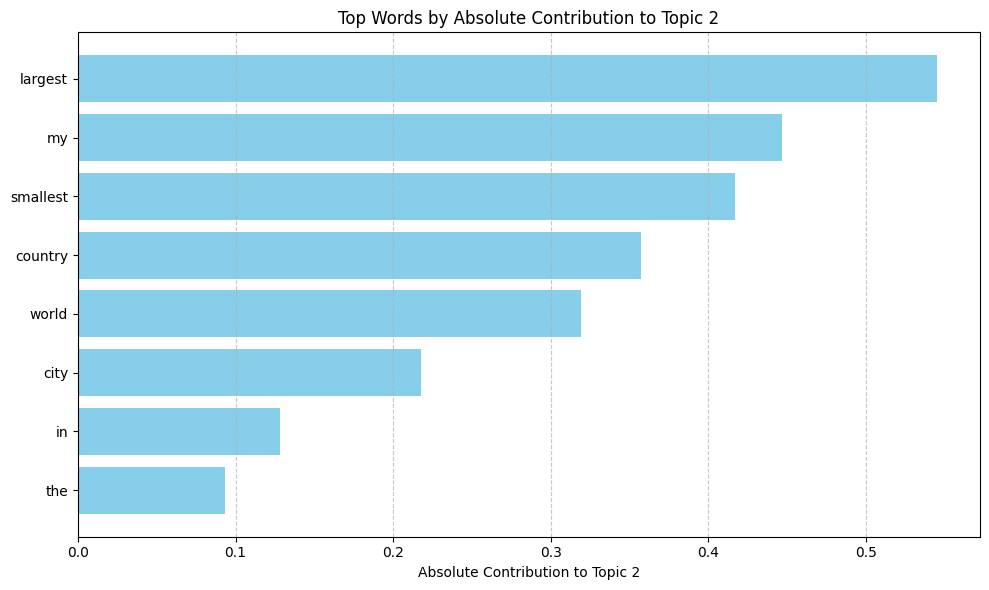

In [27]:
import matplotlib.pyplot as plt

# Sort by abs_topic_2 in descending order (already sorted as per your image)
sorted_df = encoding_matrix.sort_values('abs_topic_2', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_df.index, sorted_df['abs_topic_2'], color='skyblue')
plt.xlabel('Absolute Contribution to Topic 2')
plt.title('Top Words by Absolute Contribution to Topic 2')
plt.gca().invert_yaxis()  # Highest value on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ensure encoding_matrix has the abs_topic_2 column calculated like in your previous code:

In [28]:
import numpy as np
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])


Here's the Python code to create a side-by-side horizontal bar chart that compares both abs_topic_1 and abs_topic_2 for each word in the encoding matrix:

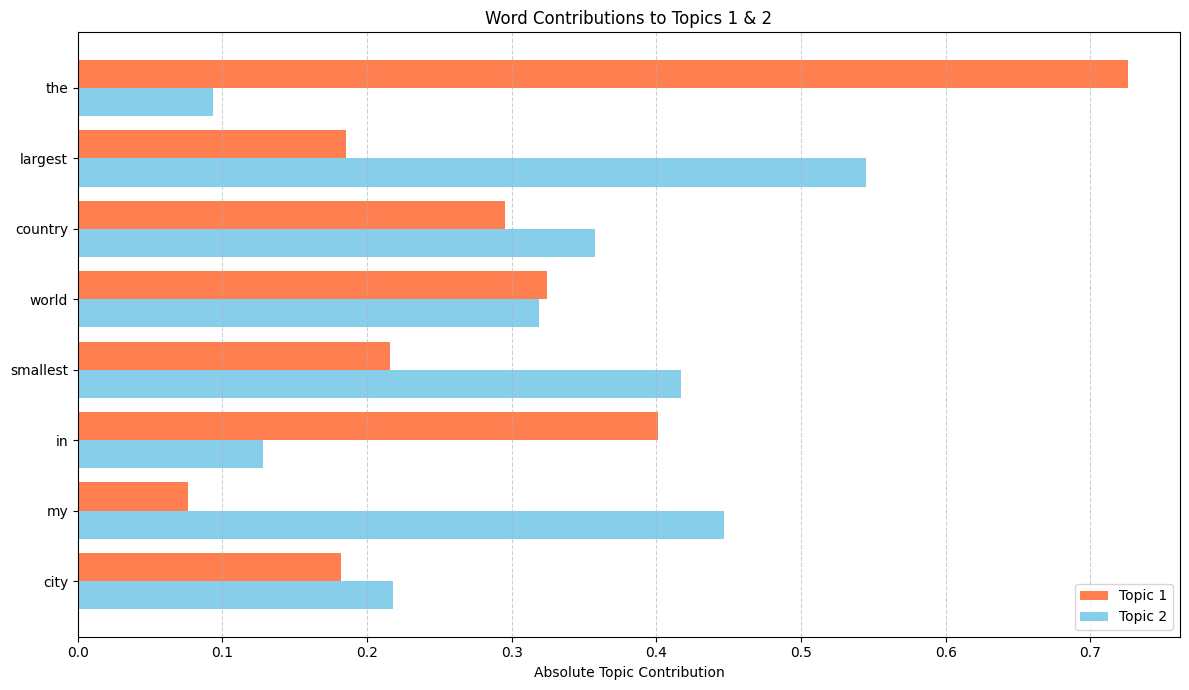

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by max of abs_topic_1 or abs_topic_2 for better visual order
sorted_df = encoding_matrix.copy()
sorted_df = sorted_df.loc[(sorted_df['abs_topic_1'] + sorted_df['abs_topic_2']).sort_values(ascending=False).index]

# Set position for each word
y = np.arange(len(sorted_df.index))

# Bar width and spacing
bar_width = 0.4

plt.figure(figsize=(12, 7))

# Plot bars for topic_1 and topic_2
plt.barh(y - bar_width/2, sorted_df['abs_topic_1'], height=bar_width, label='Topic 1', color='coral')
plt.barh(y + bar_width/2, sorted_df['abs_topic_2'], height=bar_width, label='Topic 2', color='skyblue')

# Y-axis labels
plt.yticks(y, sorted_df.index)
plt.xlabel('Absolute Topic Contribution')
plt.title('Word Contributions to Topics 1 & 2')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


Displays two bars per word: one for abs_topic_1 and one for abs_topic_2.

Makes it easy to compare how much each word contributes to either topic.

Latent Dirichlet Allocation (LDA) Algorithm in Python

 we will try to understand what is LDA algorithm. how it works and how it is implemented in python. Latent Dirichlet Allocation is an algorithm that primarily comes under the natural language processing (NLP) domain.

It is used for topic modelling. Topic modelling is a machine learning technique performed on text data to analyze it and find an abstract similar topic amongst the collection of the documents.

What is LDA?
LDA is one of the topic modelling algorithms specially designed for text data. This technique considers each document as a mixture of some of the topics that the algorithm produces as a final result. The topics are the probability distribution of the words that occur in the set of all the documents present in the dataset.

The result of preprocessed data will provide an array of keywords or tokens, LDA algorithm will take this preprocessed data as input and will try to find hidden/underlying topics based on the probability distribution of these keywords. Initially, the algorithm will assign each word in the document to a random topic out of the ‘n’ number of topics. 

For example, consider the following text data

Text 1: Excited for IPL, this year let’s go back to cricket stadiums and enjoy the game.
Text 2: We might face the 4th wave of Covid this August!
Text 3: Get vaccinated as soon as possible, it’s high time now.
Text 4: The Union Budget has increased its quota for sports this year, all thanks to the Olympics winners this year.


Theoretically, let’s consider two topics Sports and Covid for the algorithm to work on. The algorithm may assign the first word that says “IPL” for topic 2 Covid. We know this assignment is wrong, but the algorithm will try to correct this in the future iteration based on two factors that are how often the topic occurs in the document and how often the word occurs in the topic. As there are not many Covid-related terms in text 1 and the word “IPL” will not occur many times in topic 2 Covid, the algorithm may assign the word “IPL” to the new topic that is topic 1 (sports). With multiple such iterations, the algorithm will achieve stability in topic recognition and word distribution across the topics. Finally, each document can be represented as a mixture of determined topics.

How do LDA works?
The following steps are carried out in LDA to assign topics to each of the documents:

1) For each document, randomly initialize each word to a topic amongst the K topics where K is the number of pre-defined topics.

2)  For each document d:

For each word w in the document, compute:

P(topic t| document d): Proportion of words in document d that are assigned to topic t
P(word w| topic t): Proportion of assignments to topic t across all documents from words that come from w
3) Reassign topic T’ to word w with probability p(t’|d)*p(w|t’) considering all other words and their topic assignments


The last step is repeated multiple times till we reach a steady state where the topic assignments do not change further. The proportion of topics for each document is then determined from these topic assignments.


Illustrative Example of LDA:

Let us say that we have the following 4 documents as the corpus and we wish to carry out topic modelling on these documents.

Document 1: We watch a lot of videos on YouTube.
Document 2: YouTube videos are very informative.
Document 3: Reading a technical blog makes me understand things easily.
Document 4: I prefer blogs to YouTube videos.
LDA modelling helps us in discovering topics in the above corpus and assigning topic mixtures for each of the documents. As an example, the model might output something as given below:

Topic 1: 40% videos, 60% YouTube

Topic 2: 95% blogs, 5% YouTube

Documents 1 and 2 would then belong 100% to Topic 1. Document 3 would belong 100% to Topic 2. Document 4 would belong 80% to Topic 2 and 20% to Topic 1

How to implement LDA in Python?
Following are the steps to implement LDA Algorithm:

Collecting data and providing it as input
Preprocessing the data (removing the unnecessary data)
Modifying data for LDA Analysis
Building and training LDA Model
Analyzing LDA model results
Here, we have the input data collected from Twitter and converted it into a CSV file, as the data on social media is varied and we can build an efficient model.


Term Frequency (TF-IDF)
It is short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor.



Running LDA using Bag of Words

In [50]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim import corpora, models

# Optional: download required NLTK resources
nltk.download('stopwords')

# Sample documents (replace with your own)
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "India is the largest democracy in the world.",
    "AI is transforming the future of technology.",
    "The smallest country in the world is Vatican City.",
    "My city is clean and green."
]

# Initialize
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# --- Step 1: Preprocess each document ---
def tokenize_stemming(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces
    text = text.lower()
    tokens = text.split()

    result = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 1]
    return result

corpus = [tokenize_stemming(doc) for doc in documents]

# Filter out empty documents
corpus = [doc for doc in corpus if len(doc) > 0]

# --- Step 2: Build Dictionary ---
dictionary = corpora.Dictionary(corpus)

# --- Step 3: Convert to Bag-of-Words (BoW) ---
corpus_doc2bow_vectors = [dictionary.doc2bow(doc) for doc in corpus]

# --- Step 4: Build TF-IDF model ---
tfidf_model = models.TfidfModel(corpus_doc2bow_vectors, id2word=dictionary, normalize=True)
corpus_tfidf_vectors = tfidf_model[corpus_doc2bow_vectors]

# --- Step 5: Print TF-IDF vector for a document ---
doc_index = 1  # You can change this to check other documents
print(f"\n# TF-IDF for document {doc_index}:")
for term_id, tfidf_value in corpus_tfidf_vectors[doc_index]:
    print(f"{dictionary.get(term_id)}: {tfidf_value:.4f}")



# TF-IDF for document 1:
democraci: 0.5485
india: 0.5485
largest: 0.5485
world: 0.3123


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
#Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_vectors, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.050*"clean" + 0.050*"green" + 0.050*"citi" + 0.050*"technolog" + 0.050*"india" + 0.050*"democraci" + 0.050*"largest" + 0.050*"world" + 0.050*"transform" + 0.050*"countri"
Topic: 1 Word: 0.150*"vatican" + 0.150*"countri" + 0.150*"smallest" + 0.096*"world" + 0.096*"citi" + 0.024*"clean" + 0.024*"india" + 0.024*"technolog" + 0.024*"green" + 0.024*"largest"
Topic: 2 Word: 0.114*"fox" + 0.114*"dog" + 0.114*"quick" + 0.114*"jump" + 0.114*"brown" + 0.114*"lazi" + 0.022*"citi" + 0.022*"green" + 0.022*"world" + 0.022*"democraci"
Topic: 3 Word: 0.050*"clean" + 0.050*"green" + 0.050*"technolog" + 0.050*"india" + 0.050*"citi" + 0.050*"transform" + 0.050*"largest" + 0.050*"futur" + 0.050*"brown" + 0.050*"democraci"
Topic: 4 Word: 0.150*"ai" + 0.150*"futur" + 0.150*"transform" + 0.150*"technolog" + 0.025*"clean" + 0.025*"citi" + 0.025*"democraci" + 0.025*"green" + 0.025*"largest" + 0.025*"countri"
Topic: 5 Word: 0.050*"india" + 0.050*"green" + 0.050*"clean" + 0.050*"citi" + 0.050*"t

Classification of the topics
Performance evaluation by classifying sample documents using the LDA Bag of Words model We will check where our test document would be classified.

In [53]:
from gensim.models import LdaMulticore

# Create LDA model
lda_model = LdaMulticore(corpus=corpus_doc2bow_vectors,
                         id2word=dictionary,
                         num_topics=5,      # You can change number of topics
                         passes=10,
                         workers=2,
                         random_state=42)
# Print topic distribution for document at index 1
for index, score in sorted(lda_model[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8399123549461365	 
Topic: 0.129*"world" + 0.071*"vatican" + 0.071*"smallest" + 0.071*"countri" + 0.071*"technolog" + 0.071*"transform" + 0.071*"futur" + 0.071*"largest" + 0.071*"ai" + 0.071*"india"

Score: 0.040030285716056824	 
Topic: 0.050*"citi" + 0.050*"democraci" + 0.050*"india" + 0.050*"largest" + 0.050*"technolog" + 0.050*"transform" + 0.050*"ai" + 0.050*"futur" + 0.050*"world" + 0.050*"countri"

Score: 0.040030162781476974	 
Topic: 0.050*"citi" + 0.050*"democraci" + 0.050*"ai" + 0.050*"transform" + 0.050*"india" + 0.050*"largest" + 0.050*"futur" + 0.050*"technolog" + 0.050*"world" + 0.050*"countri"

Score: 0.04001613333821297	 
Topic: 0.172*"citi" + 0.171*"green" + 0.171*"clean" + 0.029*"ai" + 0.029*"democraci" + 0.029*"india" + 0.029*"largest" + 0.029*"futur" + 0.029*"transform" + 0.029*"technolog"

Score: 0.04001106321811676	 
Topic: 0.120*"lazi" + 0.120*"quick" + 0.120*"brown" + 0.120*"fox" + 0.120*"jump" + 0.120*"dog" + 0.020*"citi" + 0.020*"democraci" + 0.020*"in

Performance evaluation by classifying sample documents using the LDA TF-IDF model.

In [54]:
for index, score in sorted(lda_model_tfidf[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8199980854988098	 
Topic: 0.164*"largest" + 0.164*"democraci" + 0.164*"india" + 0.104*"world" + 0.025*"clean" + 0.025*"green" + 0.025*"technolog" + 0.025*"citi" + 0.025*"vatican" + 0.025*"countri"

Score: 0.020001491531729698	 
Topic: 0.150*"vatican" + 0.150*"countri" + 0.150*"smallest" + 0.096*"world" + 0.096*"citi" + 0.024*"clean" + 0.024*"india" + 0.024*"technolog" + 0.024*"green" + 0.024*"largest"

Score: 0.020000053569674492	 
Topic: 0.050*"clean" + 0.050*"green" + 0.050*"citi" + 0.050*"technolog" + 0.050*"india" + 0.050*"democraci" + 0.050*"largest" + 0.050*"world" + 0.050*"transform" + 0.050*"countri"

Score: 0.020000053569674492	 
Topic: 0.050*"clean" + 0.050*"green" + 0.050*"technolog" + 0.050*"india" + 0.050*"citi" + 0.050*"transform" + 0.050*"largest" + 0.050*"futur" + 0.050*"brown" + 0.050*"democraci"

Score: 0.020000053569674492	 
Topic: 0.050*"india" + 0.050*"green" + 0.050*"clean" + 0.050*"citi" + 0.050*"technolog" + 0.050*"democraci" + 0.050*"futur" + 0.050*"s